In [1]:
# import libraries

# read in data with pandas
import pandas as pd
# use numpy for vector and matrix operations
import numpy as np

# composition is a custom made python file that generates composition-based feature vectors (CBFV)
import composition
# utils is a custom made python file that has some useful functions
import utils

# make nice figures
import matplotlib.pyplot as plt
# machine learnign algorithms
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
# preprocessing for the features
from sklearn.preprocessing import StandardScaler, Normalizer
# feature reduction
from sklearn.decomposition import PCA
# import model selection tools
from sklearn.model_selection import cross_validate, cross_val_score,\
                                    cross_val_predict, learning_curve, \
                                    GridSearchCV, KFold, train_test_split
# grab metrics to evaluate our models
from sklearn.metrics import confusion_matrix, classification_report,\
                            r2_score, mean_squared_error

## Section 1: 
1. Grab data from aflow
2. read in/clean aflow data
4. remove duplicates

In [2]:
df_bulk_modulus = pd.read_csv('bulk_modulus_aflow.csv')
df_bulk_modulus.head()

,ENTRY,AEL VRH bulk modulus,atomic formation enthalpy,space group,Pearson symbol,DATA
0,Al1As1 [d1acbf7cd6bbd917],67.4056,-0.487735,216 - F43m,cF8,"[API, Out, JSON ]"
1,Al1B1Be1 [7b87669d29858aed],140.7780,-2.282620,216 - F43m,cF12,"[API, Out, JSON ]"
2,Al1Ba1Ge1 [e5990f43d042239c],44.3828,-0.471822,187 - P6m2,hP3,"[API, Out, JSON ]"
3,Al1Ba1Si1 [0655bb1b738565e8],49.0752,-0.383687,187 - P6m2,hP3,"[API, Out, JSON ]"
4,Al1Bi1 [786c95a74595dac5],37.8444,0.059670,216 - F43m,cF8,"[API, Out, JSON ]"


In [3]:
df_bulk_modulus.drop('DATA', inplace=True, axis=1)
df_bulk_modulus['ENTRY'] = [formula.split(' ')[0] for formula in df_bulk_modulus['ENTRY']]
df_bulk_modulus.head()

,ENTRY,AEL VRH bulk modulus,atomic formation enthalpy,space group,Pearson symbol
0,Al1As1 [d1acbf7cd6bbd917],67.4056,-0.487735,216 - F43m,cF8
1,Al1B1Be1 [7b87669d29858aed],140.7780,-2.282620,216 - F43m,cF12
2,Al1Ba1Ge1 [e5990f43d042239c],44.3828,-0.471822,187 - P6m2,hP3
3,Al1Ba1Si1 [0655bb1b738565e8],49.0752,-0.383687,187 - P6m2,hP3
4,Al1Bi1 [786c95a74595dac5],37.8444,0.059670,216 - F43m,cF8


In [4]:
[formula.split(' ')[0] for formula in df_bulk_modulus['ENTRY']]

['Al1As1\xa0[d1acbf7cd6bbd917]',
 'Al1B1Be1\xa0[7b87669d29858aed]',
 'Al1Ba1Ge1\xa0[e5990f43d042239c]',
 'Al1Ba1Si1\xa0[0655bb1b738565e8]',
 'Al1Bi1\xa0[786c95a74595dac5]',
 'Al1Bi1O3\xa0[d43abd3deaeccc51]',
 'Al1C1Ho3\xa0[3ecce9ff5402ec86]',
 'Al1C1Y3\xa0[a873c04ce401162f]',
 'Al1Ca1Si1\xa0[a2be57f97c3c3734]',
 'Al1Ge1Li1\xa0[a16cd7474b3ebbab]',
 'Al1Ge1Sr1\xa0[f573f77ca303f0e2]',
 'Al1Li1Si1\xa0[c854f04be2146c1c]',
 'Al1P1\xa0[bfe6fc7189a9a3a8]',
 'Al1Sb1\xa0[8efc0f655f5d4309]',
 'Al1Si1Sr1\xa0[8023faf5b757d0b6]',
 'Al1Y1\xa0[53bc333b72a0cbd5]',
 'Al1Y3\xa0[5baa20a85d1739d4]',
 'Al1Zr3\xa0[d5adc38fa8b953cf]',
 'Al2As2\xa0[b2af4cca59eb81b2]',
 'Al2Ba1Si2\xa0[544c2df3889130ff]',
 'Al2C2Zr4\xa0[c80850c41a89bd06]',
 'Al2Ge2Y2\xa0[1854ad7843d7457d]',
 'Al2Hf2\xa0[71942a90fe720e60]',
 'Al2Hf4\xa0[dd8fe80eb93c30d7]',
 'Al2Hg1Te4\xa0[9ac7d0ab226ef604]',
 'Al2K2O4\xa0[b8b7b327da0f7bb8]',
 'Al2K2Te4\xa0[fe6e33543b6edd63]',
 'Al2Li10O8\xa0[3a9e66b3bda80de3]',
 'Al2Li2\xa0[605efbba4d8ede03]',
 '

In [5]:
df_bulk_modulus['ENTRY'] = [formula.split('\xa0')[0] for formula in df_bulk_modulus['ENTRY']]

In [6]:
df_bulk_modulus.head()

,ENTRY,AEL VRH bulk modulus,atomic formation enthalpy,space group,Pearson symbol
0,Al1As1,67.4056,-0.487735,216 - F43m,cF8
1,Al1B1Be1,140.7780,-2.282620,216 - F43m,cF12
2,Al1Ba1Ge1,44.3828,-0.471822,187 - P6m2,hP3
3,Al1Ba1Si1,49.0752,-0.383687,187 - P6m2,hP3
4,Al1Bi1,37.8444,0.059670,216 - F43m,cF8


In [7]:
df_bulk_modulus.columns = ['formula', 'target', 'enthalpy', 'space_group', 'pearson_symbol']

In [8]:
df_bulk_modulus.head()

,formula,target,enthalpy,space_group,pearson_symbol
0,Al1As1,67.4056,-0.487735,216 - F43m,cF8
1,Al1B1Be1,140.7780,-2.282620,216 - F43m,cF12
2,Al1Ba1Ge1,44.3828,-0.471822,187 - P6m2,hP3
3,Al1Ba1Si1,49.0752,-0.383687,187 - P6m2,hP3
4,Al1Bi1,37.8444,0.059670,216 - F43m,cF8


This cell will probably not need to be changed. You should have everything you need to import

In [9]:
df_bulk_modulus['formula'].value_counts()

C8             6
O8Si4          4
Al8Zr4         4
Cl16Hg12O4     3
C4             3
Si2            3
Si4            3
B1C7           3
O8Zr4          3
Br4Na4O12      3
Al2Zr4         2
Ca4Mg8         2
Ba1Se1         2
Ge2            2
C12            2
Hg1Se1         2
O12Sb8         2
Li4O10Si4      2
Al4Mg2O8       2
C1Ge1          2
Ho4Mg8         2
Be1O1          2
Be1Se1         2
Na4O12Sb4      2
Mg1Te1         2
Ca1Se1         2
Mg2Te2         2
Pb1Te1         2
Cl1K1          2
Mg4Si2         2
              ..
Bi3Sr1         1
Li3Sb1         1
Cl6Rb2Te1      1
Se1Tl1         1
C1Tl1          1
Bi1Li1         1
Be24P16        1
Ho8Sb6         1
O4Te2          1
P1             1
Hg1O2Rb2       1
Ca4Ge8Li4      1
O24Tl16        1
Ba6O10Si2      1
O3Sr1Zr1       1
Al4Sr2         1
Ca1O3Zr1       1
Bi2O2Se1       1
As1Te1         1
C2K8O8         1
Bi4K12Te12     1
Hg6Mg10        1
Ho1Te1         1
Sb2Y2Zr2       1
Al2Hf2         1
Al2K2O4        1
Cl8Mg2Na4      1
Al4Ca12Sb12   

In [10]:
## take the average of duplicate composition entries
df_bulk_modulus = df_bulk_modulus.groupby('formula').mean().reset_index()
df_bulk_modulus['formula'].value_counts()

Bi4Mg2O12     1
Ca4Pb4Sr4     1
C1Na4O4       1
K2Li2Se2      1
C2Ca2O6       1
Ba1Li1Si1     1
Al2Y2         1
Na2           1
Al1Li1Si1     1
Hf2           1
Ca1Pb1        1
Li2Se1        1
Be26Mg2       1
Ba1O3Zr1      1
Ba2O4Zr1      1
Cl6Rb2Zr1     1
Bi8O12        1
C19Si19       1
P1Zr1         1
Be1O1         1
O8Si2Zr2      1
Cl1Rb1        1
Br1Li1        1
Ba6Pb10       1
Sb2Sr4        1
Bi1Li3        1
Li1Tl1        1
As4O12Sr2     1
K8Te12        1
Li1Mg4Si2     1
             ..
Hg6Mg10       1
Ca4Ge8Li4     1
Hg1O2Rb2      1
P1            1
Be26Sr2       1
O8P2Y2        1
Ba1Mg4Si3     1
Ba3O1Pb1      1
O24Tl16       1
C2K8O8        1
As1Te1        1
Bi2O2Se1      1
Ca1O3Si1      1
Al6C6Y2       1
As1Ba1Li1     1
Br2Se4Tl10    1
Br9Rb3Sb2     1
Mg4Se8        1
As8Hf12       1
Ba1           1
Hf12P8        1
P4            1
Ca1O2         1
Ca8Cl12O2     1
Mg8Sr4        1
Ba6O10Si2     1
O3Sr1Zr1      1
Al4Sr2        1
Ca1O3Zr1      1
P1Tl1         1
Name: formula, Length: 6

Text(0, 0.5, '# of instances')

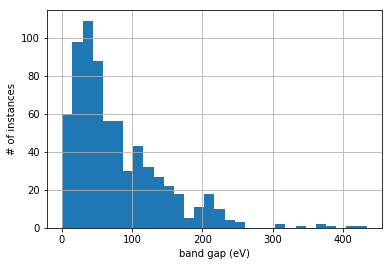

In [11]:
df_bulk_modulus['target'].hist(bins=30)
plt.xlabel('band gap (eV)')
plt.ylabel('# of instances')

## Section 2: 
1. featurize data
    - bonus if you can include information from pearson symbol in your features 
2. scale/normalize data
3. make rf and ridge predictions

In [12]:
X, y, formula = composition.generate_features(df_bulk_modulus)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
# we now want to process our data. We are going to use the SVR algorithm.
# This algorithm is based on gradient descent and needs similar feature scales.

# scale each column of data to have a mean of 0 and a variance of 1
scaler = StandardScaler()
# normalizes each row in the data
normalizer = Normalizer()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(normalizer.fit_transform(X_train_scaled),
                              columns=X_train.columns.values)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(normalizer.transform(X_test_scaled),
                              columns=X_test.columns.values)

R2 score = 0.7706933502017882


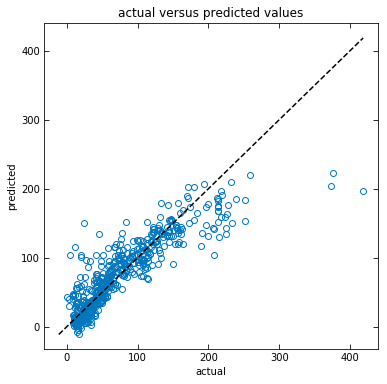

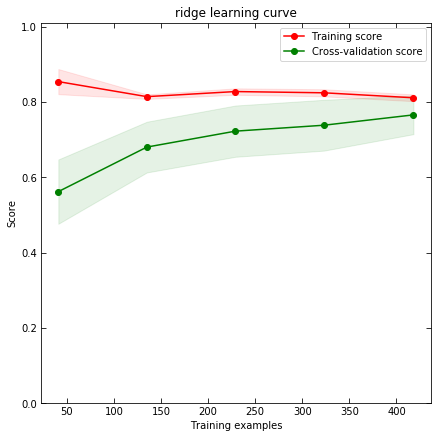

In [15]:
rr = Ridge()
cv = KFold(n_splits=5, shuffle=True, random_state=1)
y_pred_train = cross_val_predict(rr, X_train_scaled, y_train, cv=cv)
print('R2 score =', r2_score(y_train, y_pred_train))
utils.plot_act_vs_pred(y_train, y_pred_train)

title = "ridge learning curve"
utils.plot_learning_curve(rr, title, X_train_scaled, y_train, ylim=(0.0, 1.01), cv=5, n_jobs=-1)

R2 score = 0.8012451380484467


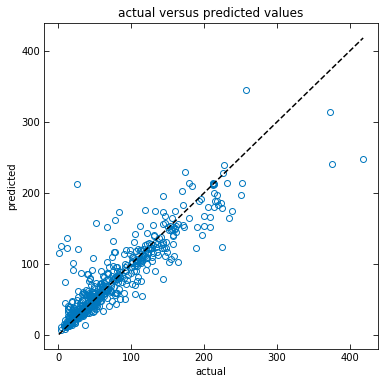

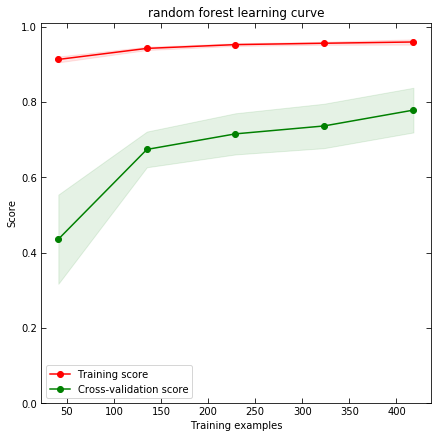

In [16]:
rf = RandomForestRegressor(max_features='sqrt')
cv = KFold(n_splits=5, shuffle=True, random_state=1)
y_pred_train = cross_val_predict(rf, X_train, y_train, cv=cv)
print('R2 score =', r2_score(y_train, y_pred_train))
utils.plot_act_vs_pred(y_train, y_pred_train)

title = "random forest learning curve"
utils.plot_learning_curve(rf, title, X_train_scaled, y_train, ylim=(0.0, 1.01), cv=5, n_jobs=-1)

## Section 3
1. perform grid search over SVR parameters C & gamma
2. perform grid search over RF parameters n_estimators, max_depth
3. get cv-score for best SVR
4. get cv-score for best rf

In [31]:
def grid_search(X, y, model, parameter_candidates, n_cv=3, title='Grid search results'):
    grid = GridSearchCV(estimator=model,
                        param_grid=parameter_candidates,
                        cv=n_cv,
                        n_jobs=4)
    grid.fit(X, y)
    return grid

### SVR

In [43]:

svr = SVR()
array_C = np.logspace(-1, 4, 6)
array_gamma = np.logspace(-2, 1, 6)
parameter_candidates = {'C': array_C, 'gamma': array_gamma}

grid = grid_search(X_train_scaled, y_train, svr, parameter_candidates, n_cv=3, title='Grid search results')

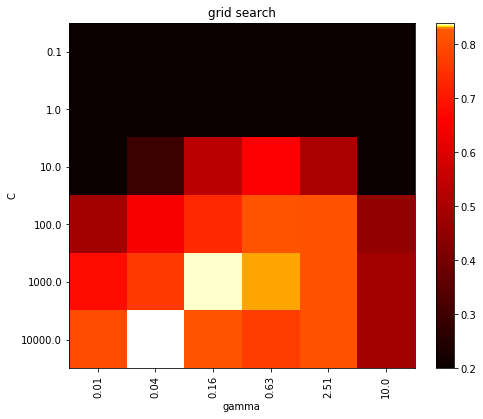

best parameters: {'C': 10000.0, 'gamma': 0.039810717055349734}


In [44]:
utils.plot_grid_search(grid, 0.83)
print('best parameters:', grid.best_params_)

R2 score = 0.842682370570594


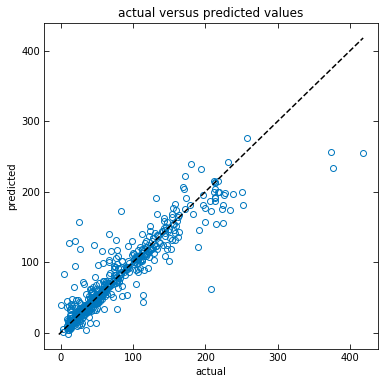

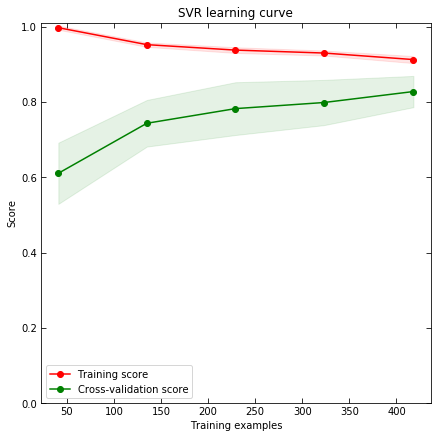

In [45]:
# Initialize a "SVR" object.
svr = SVR(**grid.best_params_)
cv = KFold(n_splits=5, shuffle=True, random_state=1)
y_pred_train = cross_val_predict(svr, X_train_scaled, y_train, cv=cv)
print('R2 score =', r2_score(y_train, y_pred_train))
utils.plot_act_vs_pred(y_train, y_pred_train)

title = "SVR learning curve"
utils.plot_learning_curve(svr, title, X_train_scaled, y_train, ylim=(0.0, 1.01), cv=5, n_jobs=-1)

## Random Forest

In [49]:
rf = RandomForestRegressor(max_features='sqrt')
n_estimators_array = np.linspace(5, 50, 10).astype(int)
max_depth_array = np.linspace(2, 25, 10).astype(int)
parameter_candidates = {'n_estimators': n_estimators_array, 'max_depth': max_depth_array}

grid = grid_search(X_train, y_train, rf, parameter_candidates, n_cv=3, title='Grid search results')

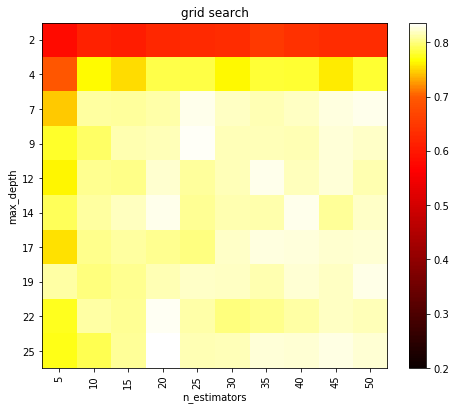

best parameters: {'max_depth': 25, 'n_estimators': 20}


In [50]:
utils.plot_grid_search(grid)
print('best parameters:', grid.best_params_)

R2 score = 0.8423229198818387


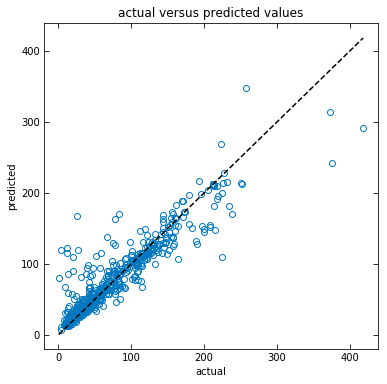

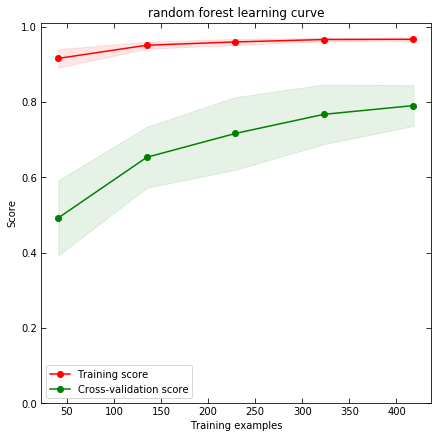

In [51]:
rf = RandomForestRegressor(max_features='sqrt', **grid.best_params_)
cv = KFold(n_splits=5, shuffle=True, random_state=1)
y_pred_train = cross_val_predict(rf, X_train, y_train, cv=cv)
print('R2 score =', r2_score(y_train, y_pred_train))
utils.plot_act_vs_pred(y_train, y_pred_train)

title = "random forest learning curve"
utils.plot_learning_curve(rf, title, X_train_scaled, y_train, ylim=(0.0, 1.01), cv=5, n_jobs=-1)

## Create your 'best mode' and Generate a prediction for the test data

In [35]:
best_svr = SVR(**{'C': 10000.0, 'gamma': 0.039810717055349734})
best_svr.fit(X_train_scaled, y_train)
y_pred_test = best_svr.predict(X_test_scaled)

print('test score =', r2_score(y_test, y_pred_test))

test score = 0.7483997725757167


In [38]:
best_rf = RandomForestRegressor(max_features='sqrt', **{'max_depth': 13, 'n_estimators': 87}, random_state=1)
best_rf.fit(X_train, y_train)
y_pred_test = best_rf.predict(X_test)

print('test score =', r2_score(y_test, y_pred_test))

test score = 0.7736122290728791
